In [2]:
# Looking at IRS data only first, what factors could influence how much someone donates? 

# Per county, what is the relationship between amt donated and:
# - avg # of dependents
# - avg adjusted gross income
# - avg unemployment compensation
# - personal property taxes
# - earned income credit
# - investment interest taxes
# 

In [3]:
import pandas as pd

In [4]:
# Step 1: Read in csv of IRS data for Utah per county
county_df = pd.read_csv('utah-counties.csv')

# Need to manually select columns and rename to be more descriptive
county_df.rename(columns={
    'agi_stub': 'Adj_Income_Level', 
    'N1': 'Num_Rtns',
    'MARS1' : 'Num_Single_Rtns',
    'MARS2' : 'Num_Joint_Rtns',
    'MARS4' : 'Num_HH_Rtns',
    'A00100' : 'Adj_Gross_Inc',
    'N02650' : 'Num_Returns_w_Total_Inc',
    'A02650' : 'Total_Inc_Amt',
    'SCHF' : 'Num_Farm_Rtns',
    'N02300' : 'Num_Unempl_Rtns',
    'A02300' : 'Unempl_Comp_Amt',
    'N18800' : 'Num_Pers_Prop_Rtns',
    'A18800' : 'Pers_Prop_TxAmt',
    'N19570' : 'Num_Inv_Int_Rtns',
    'A19570' : 'Inv_Int_Amt',
    'N19700' : 'Num_Donations_Rtns',
    'A19700' : 'Donations_Amt',
    'N59660' : 'Num_EIC_Rtns',
    'A59660' : 'EIC_Amt'
    
}, inplace = True)

county_df = county_df.filter(['STATEFIPS', 
                      'STATE', 
                      'COUNTYFIPS', 
                      'COUNTYNAME', 
                      'Adj_Income_Level', 
                      'Num_Rtns', 
                      'Num_Single_Rtns',
                      'Num_Joint_Rtns',
                      'Num_HH_Rtns',
                      'Adj_Gross_Inc',
                      'Num_Returns_w_Total_Inc',
                      'Total_Inc_Amt',
                      'Num_Farm_Rtns',
                      'Num_Unempl_Rtns',
                      'Unempl_Comp_Amt',
                      'Num_Pers_Prop_Rtns',
                      'Pers_Prop_TxAmt',
                      'Num_Inv_Int_Rtns',
                      'Inv_Int_Amt',
                      'Num_Donations_Rtns',
                      'Donations_Amt',
                      'Num_EIC_Rtns',
                      'EIC_Amt'])
county_df.head()

# Remove "Utah" rows since that is the aggregate data for all counties
county_df = county_df[county_df['COUNTYFIPS'] != 0]

In [5]:
# For reference, Adj_Income_Level column value reference these ranges:
# 0 = No AGI Stub (Total)
# 1 = Under $1
# 2 = $1 under $10,000
# 3 = $10,000 under $25,000
# 4 = $25,000 under $50,000
# 5 = $50,000 under $75,000
# 6 = $75,000 under $100,000
# 7 = $100,000 under $200,000
# 8 = $200,000 or more

In [6]:
# Let's start by looking at only 1 income level at a time
# Income level 5 is around the average salary range

county_df_subset = county_df[county_df['Adj_Income_Level'] == 5]

In [7]:
import matplotlib.pyplot as plt
import numpy as np

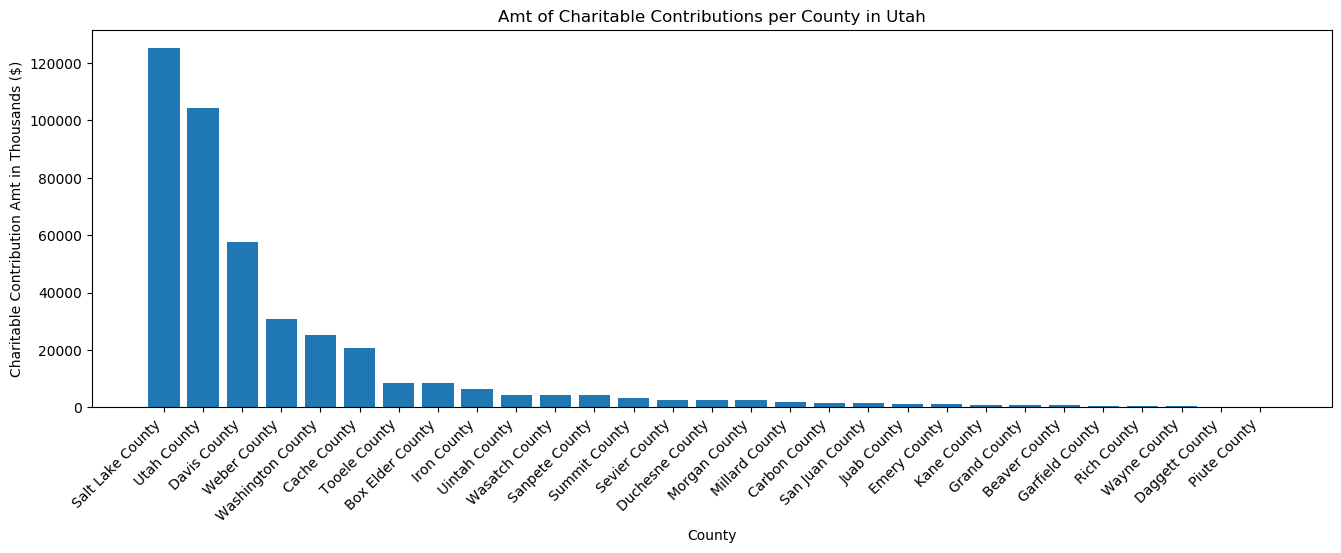

In [152]:
# For this income level, what do the charitable contributions look like?
plt.figure(figsize=(16,5), dpi=100)
cty_df_sorted = county_df_subset.sort_values('Donations_Amt', ascending=False)

plt.bar(x=cty_df_sorted['COUNTYNAME'], height=cty_df_sorted['Donations_Amt'])

plt.xlabel('County')
plt.ylabel('Charitable Contribution Amt in Thousands ($)')
plt.title('Amt of Charitable Contributions per County in Utah')
plt.xticks(rotation=45, ha='right')

plt.show()

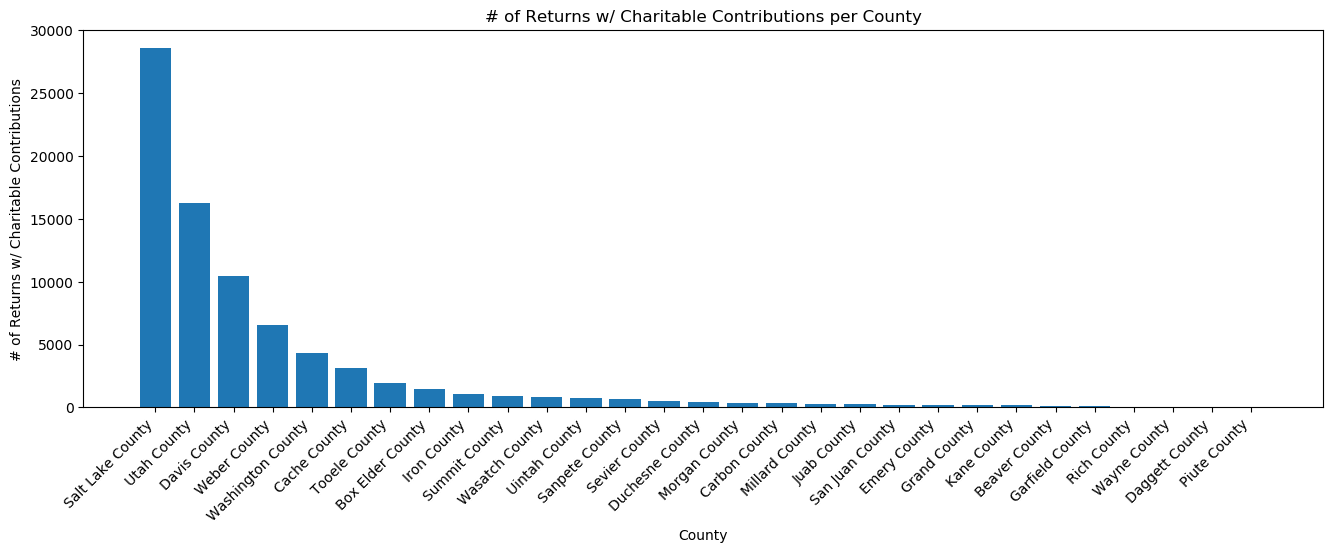

In [146]:
# For this income level, what do the charitable contributions look like?
plt.figure(figsize=(16,5), dpi=100)
cty_df_sorted = county_df_subset.sort_values('Num_Donations_Rtns', ascending=False)

plt.bar(x=cty_df_sorted['COUNTYNAME'], height=cty_df_sorted['Num_Donations_Rtns'])

plt.xlabel('County')
plt.ylabel('# of Returns w/ Charitable Contributions')
plt.title('# of Returns w/ Charitable Contributions per County')
plt.xticks(rotation=45, ha="right")

plt.show()

In [120]:
# Need to normalize by # of returns
don_amt_per_rtn = county_df_subset['Donations_Amt'] / county_df_subset['Num_Donations_Rtns']
county_df_subset = county_df_subset.assign(Donation_Amt_per_Rtn=don_amt_per_rtn)
county_df_subset

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,Adj_Income_Level,Num_Rtns,Num_Joint_Rtns,Num_HH_Rtns,Adj_Gross_Inc,Num_Returns_w_Total_Inc,...,Unempl_Comp_Amt,Num_Pers_Prop_Rtns,Pers_Prop_TxAmt,Num_Inv_Int_Rtns,Inv_Int_Amt,Num_Donations_Rtns,Donations_Amt,Num_EIC_Rtns,EIC_Amt,Donation_Amt_per_Rtn
12,49,UT,1,Beaver County,5,430,340,40,26292,430,...,204,60,20,0,0,120,703,0,0,5.858333
20,49,UT,3,Box Elder County,5,3870,2840,230,239147,3870,...,573,310,149,30,63,1440,8361,100,37,5.806250
28,49,UT,5,Cache County,5,7210,5540,380,444864,7210,...,1125,610,234,30,53,3100,20663,180,60,6.665484
36,49,UT,7,Carbon County,5,1260,830,100,78535,1260,...,416,80,44,0,0,310,1544,0,0,4.980645
44,49,UT,9,Daggett County,5,60,50,0,3781,60,...,0,0,0,0,0,40,219,0,0,5.475000
52,49,UT,11,Davis County,5,23050,14660,1990,1429865,23050,...,2994,2650,1080,80,171,10420,57601,340,114,5.527927
60,49,UT,13,Duchesne County,5,1280,920,100,78991,1280,...,656,120,43,0,0,420,2581,30,10,6.145238
68,49,UT,15,Emery County,5,640,500,50,39540,640,...,250,50,22,0,0,180,1173,0,0,6.516667
76,49,UT,17,Garfield County,5,310,230,0,18927,310,...,162,40,20,0,0,90,633,0,0,7.033333
84,49,UT,19,Grand County,5,690,390,50,42091,690,...,290,50,20,0,0,170,707,0,0,4.158824


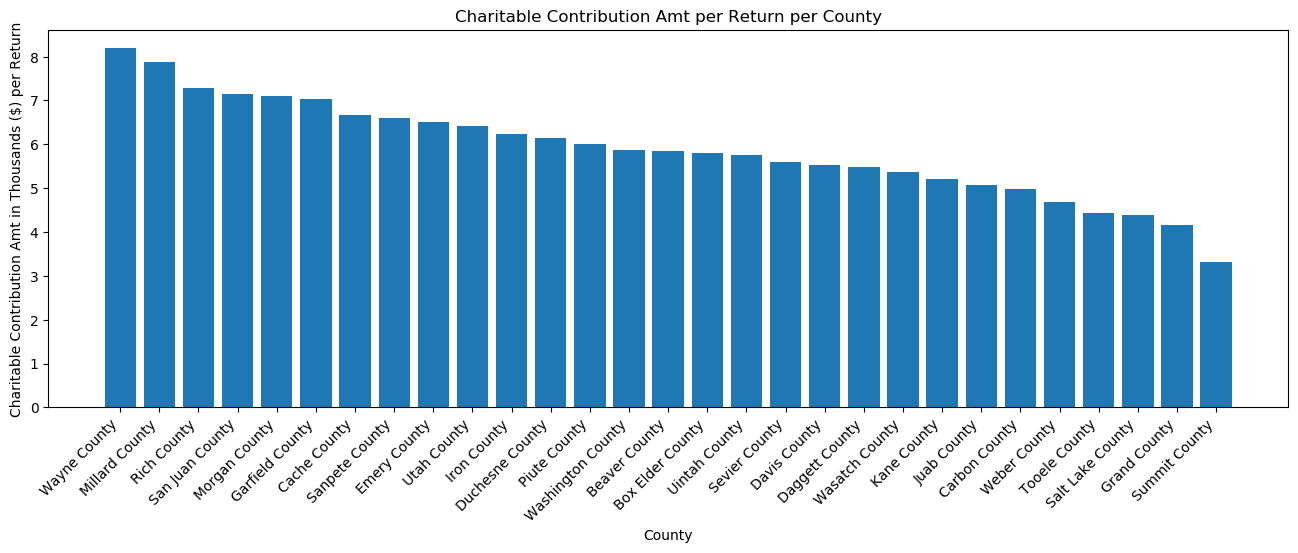

In [155]:
# For this income level, what do the charitable contributions look like?
cty_df_sorted = county_df_subset.sort_values('Donation_Amt_per_Rtn', ascending=False)

plt.figure(figsize=(16,5), dpi=100)

plt.bar(x=cty_df_sorted['COUNTYNAME'], height=cty_df_sorted['Donation_Amt_per_Rtn'])

plt.xlabel('County')
plt.ylabel('Charitable Contribution Amt in Thousands ($) per Return')
plt.title('Charitable Contribution Amt per Return per County')
plt.xticks(rotation=45, ha='right')

plt.show()